In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Loading the dataset
drive.mount('/content/drive')
#data = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify_songs.csv to spotify_songs.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
df = pd.read_csv('spotify_songs.csv')

In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


**Dataset Overview:**

The Spotify dataset contains the following key columns:


1.  **Track Metadata:** Includes track_name, track_artist, track_album_name, and track_album_release_date.
2.  **Audio Features:** Metrics like tempo, loudness, acousticness, danceability, and speechiness.
3. **Popularity Metric:** track_popularity indicates the popularity score for each track.
4. **Playlist Information:** Includes playlist_name and playlist_genre.

In [ ]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Exploratory Data Analysis

1. Playlist Genre vs Track Popularity

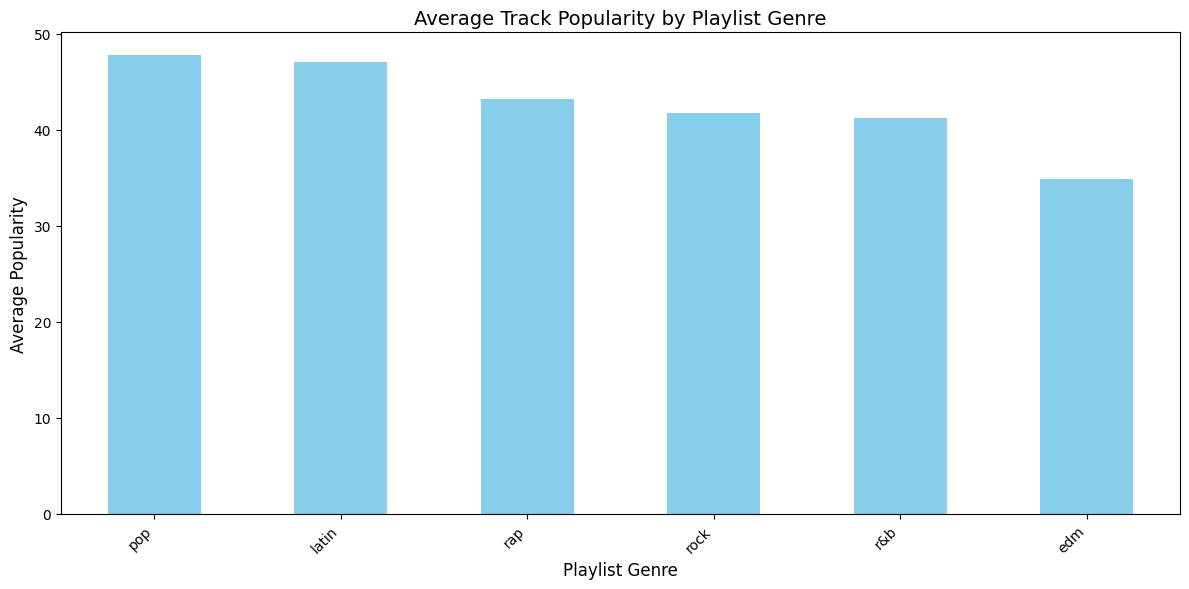

In [ ]:
# Bar chart: Average popularity by playlist genre
plt.figure(figsize=(12, 6))
avg_popularity_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
avg_popularity_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Track Popularity by Playlist Genre', fontsize=14)
plt.ylabel('Average Popularity', fontsize=12)
plt.xlabel('Playlist Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-8-e4e2cd102b8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='playlist_genre', y='track_popularity', palette='Set3')


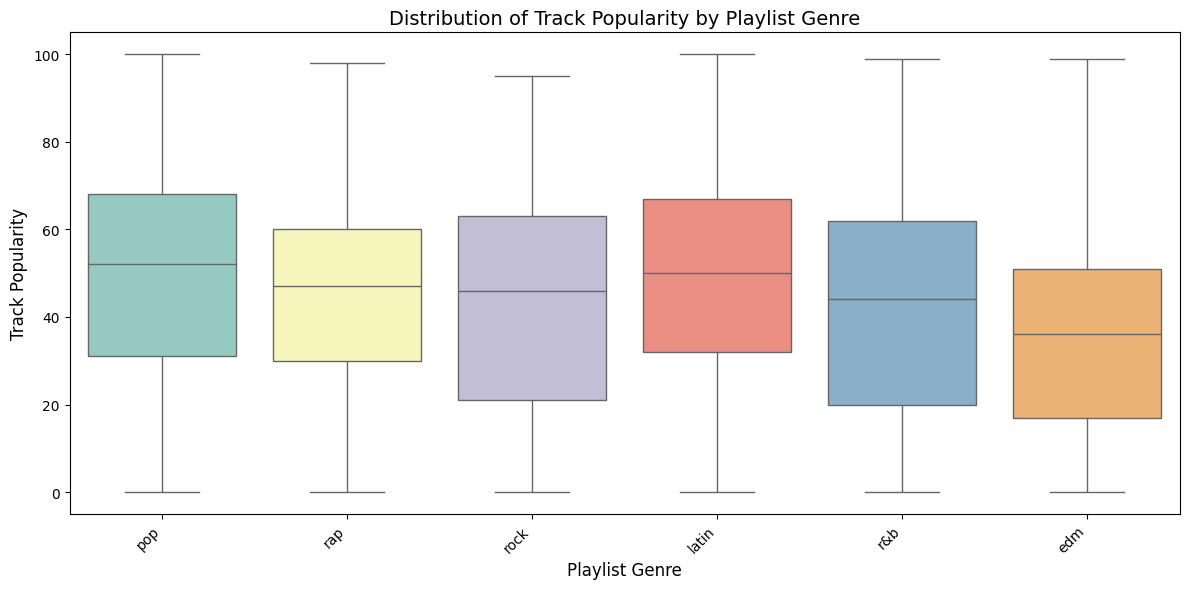

In [ ]:
# Boxplot: Distribution of popularity scores for each genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='playlist_genre', y='track_popularity', palette='Set3')
plt.title('Distribution of Track Popularity by Playlist Genre', fontsize=14)
plt.ylabel('Track Popularity', fontsize=12)
plt.xlabel('Playlist Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. Similarity between Less Popular and More Popular Songs

2.1 Cluster Analysis

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardizing the relevant features for clustering
features = ['valence', 'energy', 'track_popularity']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

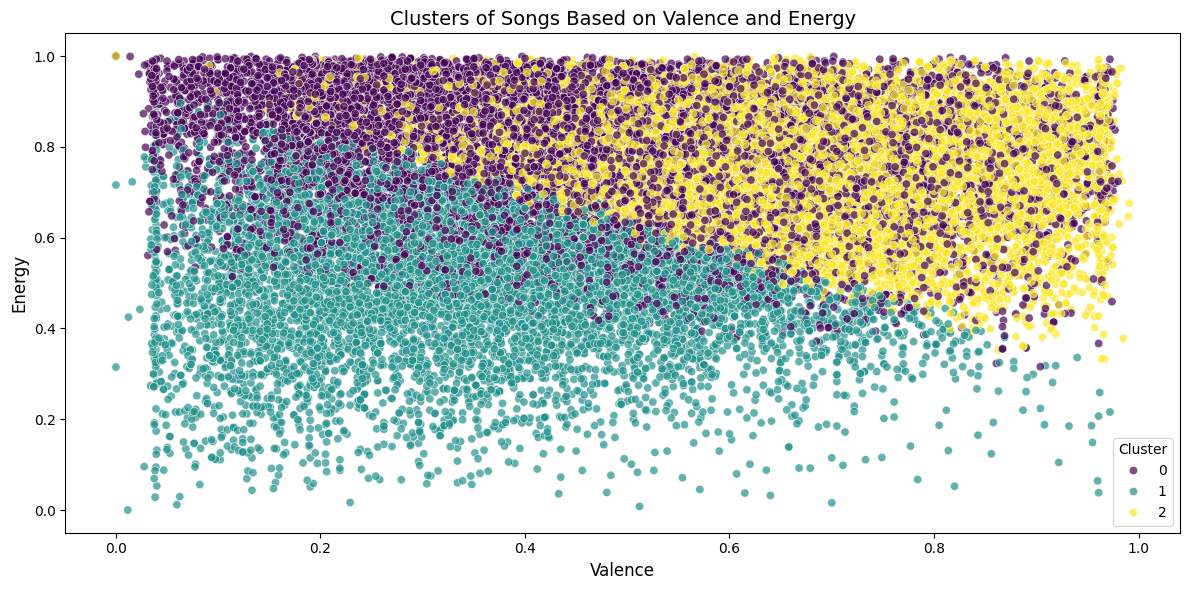

In [ ]:
# Scatter plot: Clusters of songs using valence, energy, and popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df['valence'],
    y=df['energy'],
    hue=df['cluster'],
    palette='viridis',
    alpha=0.7
)
plt.title('Clusters of Songs Based on Valence and Energy', fontsize=14)
plt.xlabel('Valence', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

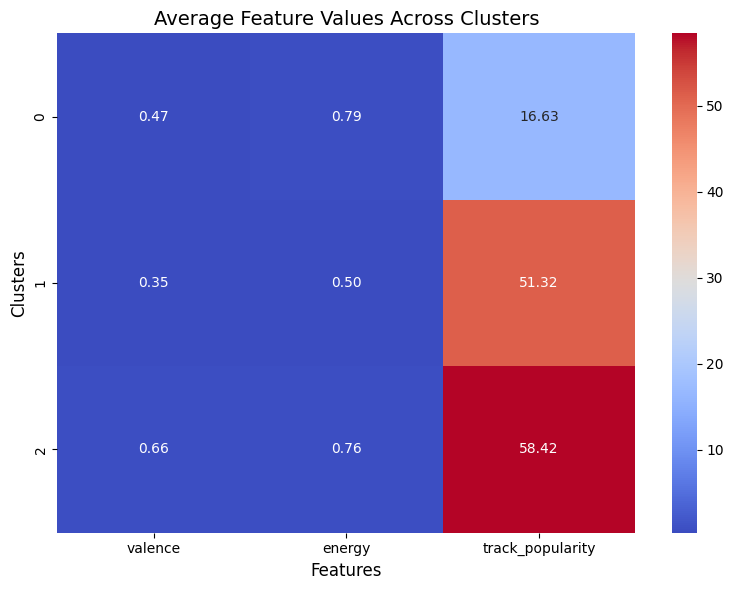

In [ ]:
# Heatmap: Average feature values across clusters
cluster_features = df.groupby('cluster')[features].mean()
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_features, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Feature Values Across Clusters', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.tight_layout()
plt.show()

2.2 Identifying Key Features Using Feature Importance

In [ ]:
# Re-importing necessary libraries due to environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
features = ['valence', 'energy', 'danceability', 'acousticness', 'tempo', 'loudness']
target = 'track_popularity'

# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying Random Forest for feature importance
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Extracting feature importances
feature_importances = rf_model.feature_importances_
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

<ipython-input-15-f177cbba21ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


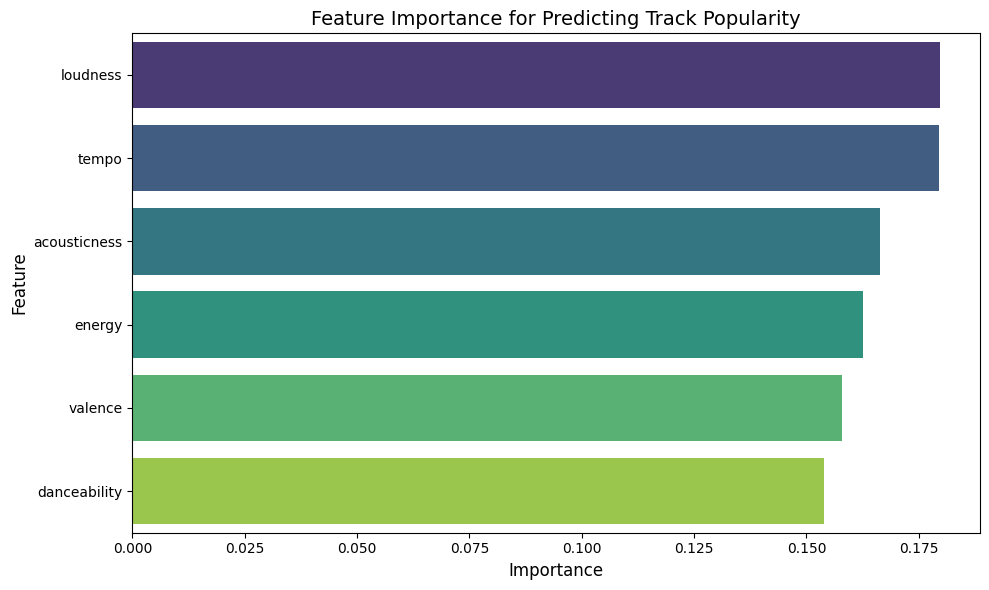

In [ ]:
# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importance for Predicting Track Popularity', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

2.3 Comparing Feature Distributions for More Popular and Less Popular Songs

In [ ]:
# Proceeding with 2.3 Comparing Feature Distributions for More Popular and Less Popular Songs
# Define popular and less popular categories
df['popularity_category'] = df['track_popularity'].apply(lambda x: 'More Popular' if x >= 50 else 'Less Popular')

<ipython-input-17-7ead08233db1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='popularity_category', y=feature, data=df, palette='muted')
<ipython-input-17-7ead08233db1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='popularity_category', y=feature, data=df, palette='muted')


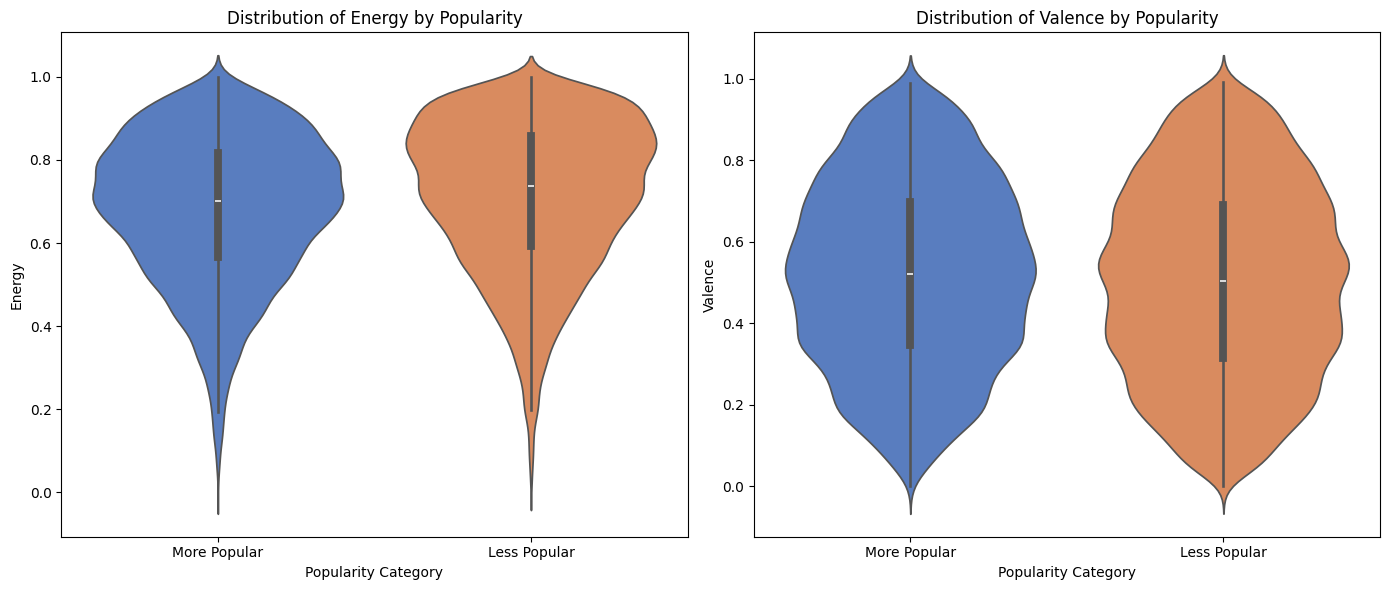

,Feature,Importance
5,loudness,0.179639
4,tempo,0.179595
3,acousticness,0.166283
1,energy,0.162528
0,valence,0.158010
2,danceability,0.153945


In [ ]:
# Violin plot: Feature distributions (e.g., energy, valence) for popular vs. less popular songs
plt.figure(figsize=(14, 6))

for i, feature in enumerate(['energy', 'valence'], 1):
    plt.subplot(1, 2, i)
    sns.violinplot(x='popularity_category', y=feature, data=df, palette='muted')
    plt.title(f'Distribution of {feature.capitalize()} by Popularity', fontsize=12)
    plt.xlabel('Popularity Category', fontsize=10)
    plt.ylabel(feature.capitalize(), fontsize=10)

plt.tight_layout()
plt.show()

importances_df

3. More Popular vs Less Popular Songs by Genre

In [ ]:
# Stacked bar chart: Count of more/less popular songs for each genre
popularity_genre_counts = df.groupby(['playlist_genre', 'popularity_category']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

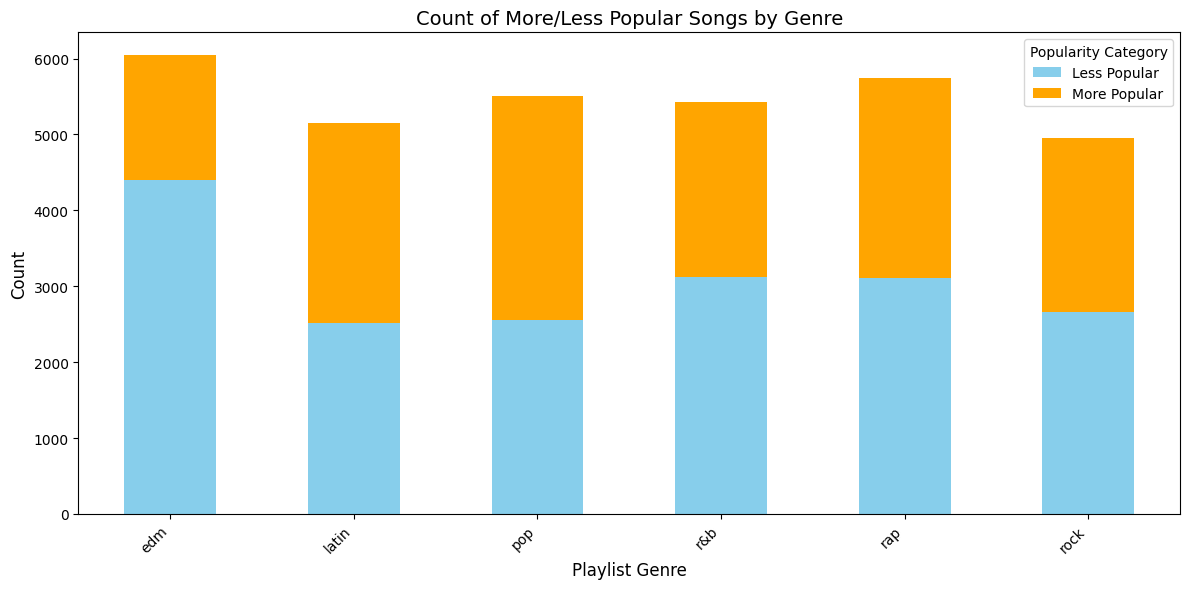

In [ ]:
plt.figure(figsize=(12, 6))
popularity_genre_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Count of More/Less Popular Songs by Genre', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Playlist Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Popularity Category')
plt.tight_layout()
plt.show()

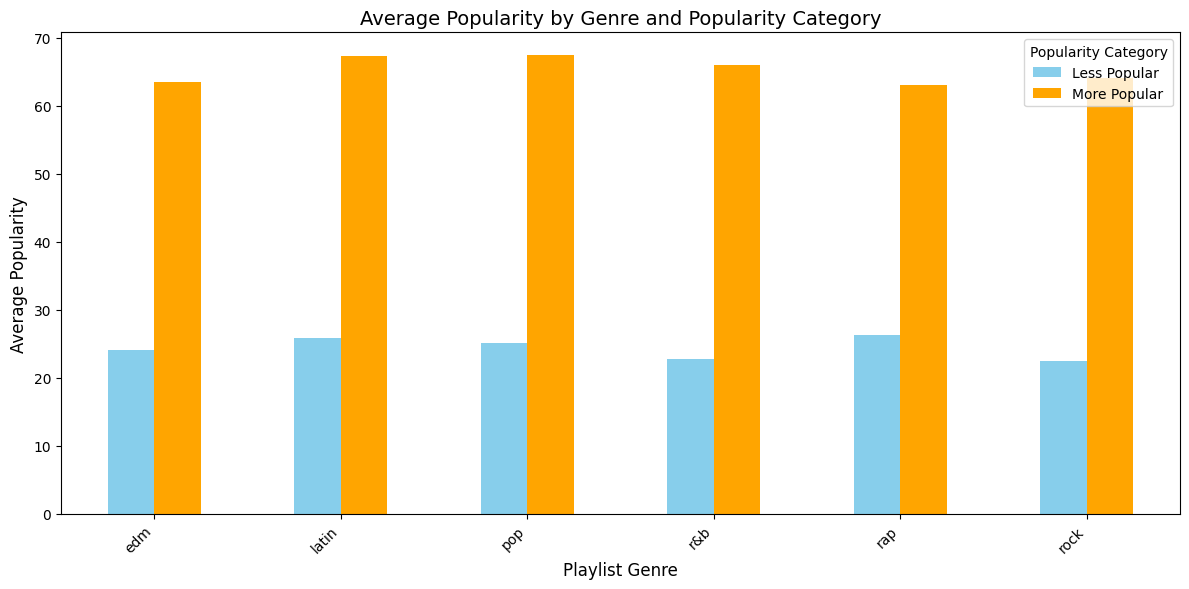

In [ ]:
# Grouped bar chart: Average popularity for each genre, divided into popular and less popular songs
avg_popularity_genre = df.groupby(['playlist_genre', 'popularity_category'])['track_popularity'].mean().unstack()

avg_popularity_genre.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Average Popularity by Genre and Popularity Category', fontsize=14)
plt.ylabel('Average Popularity', fontsize=12)
plt.xlabel('Playlist Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Popularity Category')
plt.tight_layout()
plt.show()

4. Top artists and genres

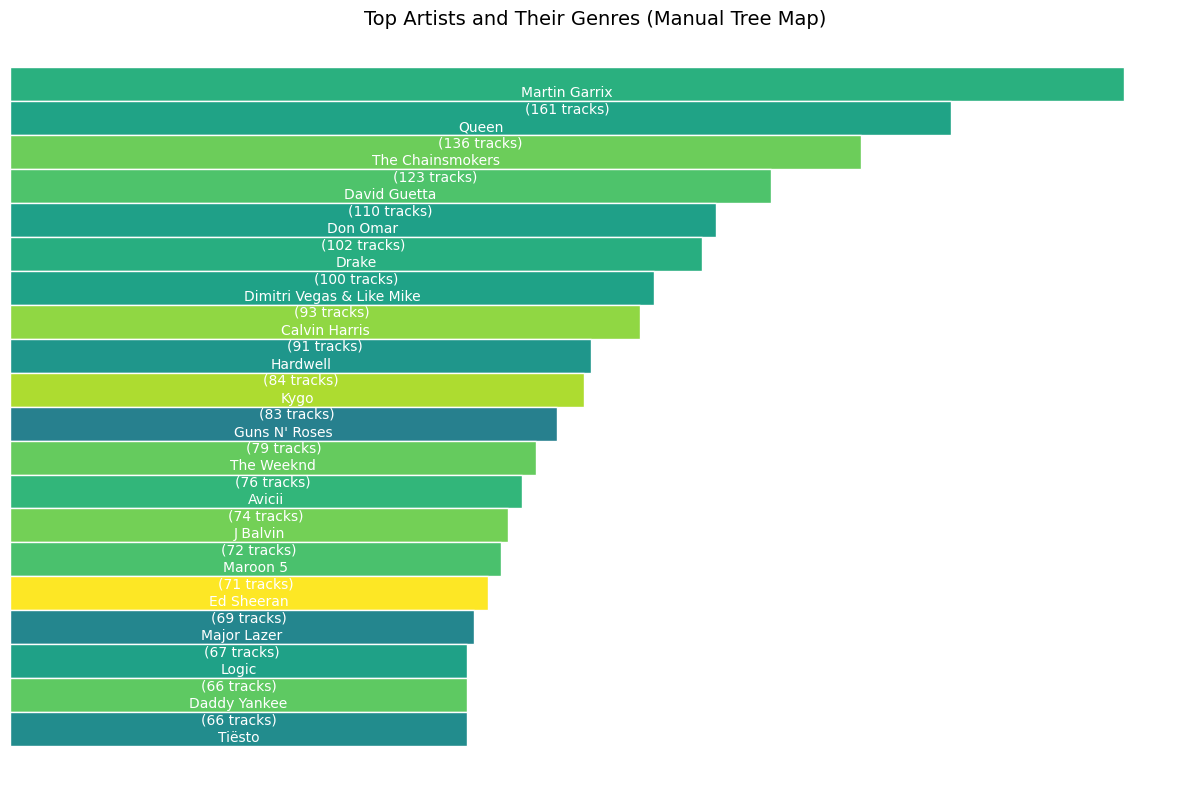

In [ ]:
# Simplified Tree Map Using Matplotlib
import matplotlib.pyplot as plt

# Prepare top artists data
top_artists = df.groupby('track_artist').agg({
    'track_id': 'count',  # Count of tracks
    'track_popularity': 'mean'  # Average popularity
}).sort_values(by='track_id', ascending=False).head(20)

# Adjusting labels for visualization
top_artists['label'] = [f"{artist}\n({tracks} tracks)" for artist, tracks in zip(top_artists.index, top_artists['track_id'])]

plt.figure(figsize=(12, 8))

# Define colors based on average popularity
colors = plt.cm.viridis(top_artists['track_popularity'] / top_artists['track_popularity'].max())

# Manually creating a horizontal bar representation of the tree map
y_start = 0
height = 1 / len(top_artists)
for i, (artist, row) in enumerate(top_artists.iterrows()):
    plt.barh(y_start + i * height, row['track_id'], color=colors[i], edgecolor="white", height=height)
    plt.text(row['track_id'] / 2, y_start + i * height + height / 2,
             f"{artist}\n({int(row['track_id'])} tracks)", va='center', ha='center', color="white", fontsize=10)

plt.gca().invert_yaxis()
plt.title("Top Artists and Their Genres (Manual Tree Map)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

5. To Artists by Average Popularity Score

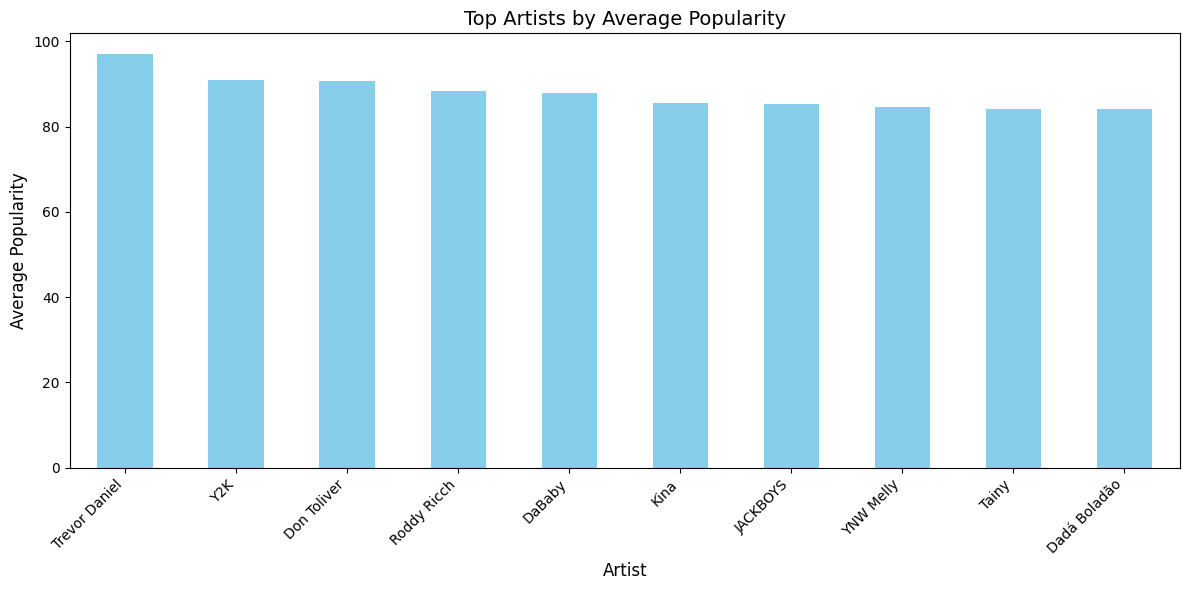

In [ ]:
# Section 5: Top Artists by Average Popularity Score

# Top artists by average popularity
top_artists_popularity = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_artists_popularity.plot(kind='bar', color='skyblue')
plt.title('Top Artists by Average Popularity', fontsize=14)
plt.ylabel('Average Popularity', fontsize=12)
plt.xlabel('Artist', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

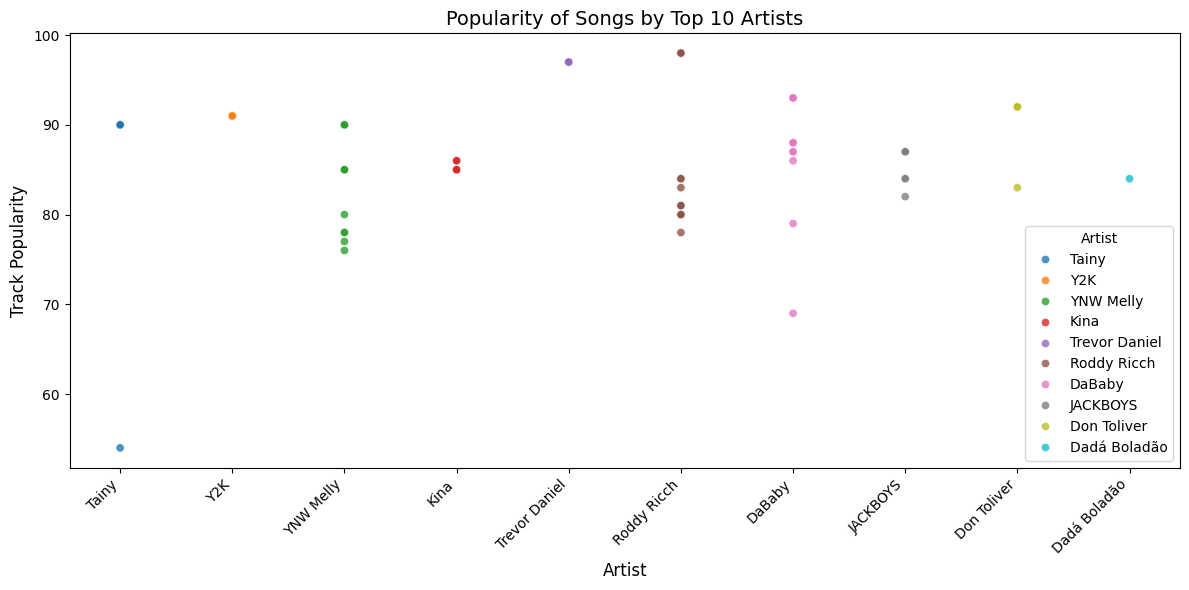

In [ ]:
# Scatter plot: Popularity of songs for the top 10 artists
top_10_artists = top_artists_popularity.index
songs_top_10_artists = df[df['track_artist'].isin(top_10_artists)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=songs_top_10_artists, x='track_artist', y='track_popularity', hue='track_artist', palette='tab10', alpha=0.8)
plt.title('Popularity of Songs by Top 10 Artists', fontsize=14)
plt.ylabel('Track Popularity', fontsize=12)
plt.xlabel('Artist', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Artist')
plt.tight_layout()
plt.show()

6. Song Popularity Analysis

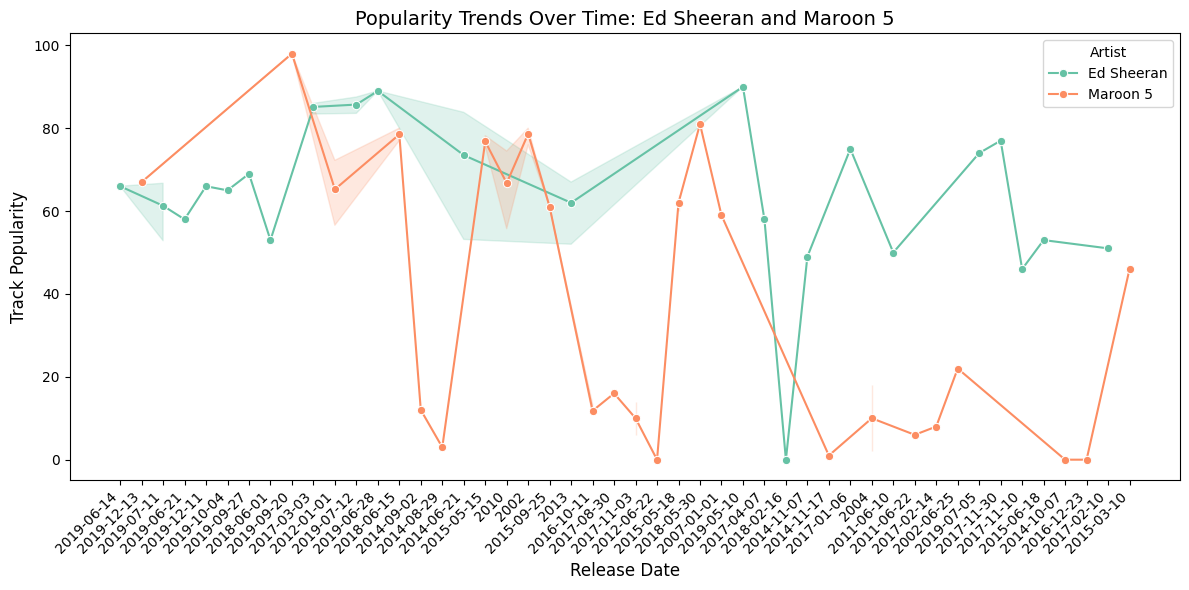

In [ ]:
artists_analysis = df[df['track_artist'].isin(['Ed Sheeran', 'Maroon 5'])]

# Line chart: Popularity trends over time for Ed Sheeran and Maroon 5
plt.figure(figsize=(12, 6))
sns.lineplot(data=artists_analysis, x='track_album_release_date', y='track_popularity', hue='track_artist', palette='Set2', marker='o')
plt.title('Popularity Trends Over Time: Ed Sheeran and Maroon 5', fontsize=14)
plt.ylabel('Track Popularity', fontsize=12)
plt.xlabel('Release Date', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Artist')
plt.tight_layout()
plt.show()

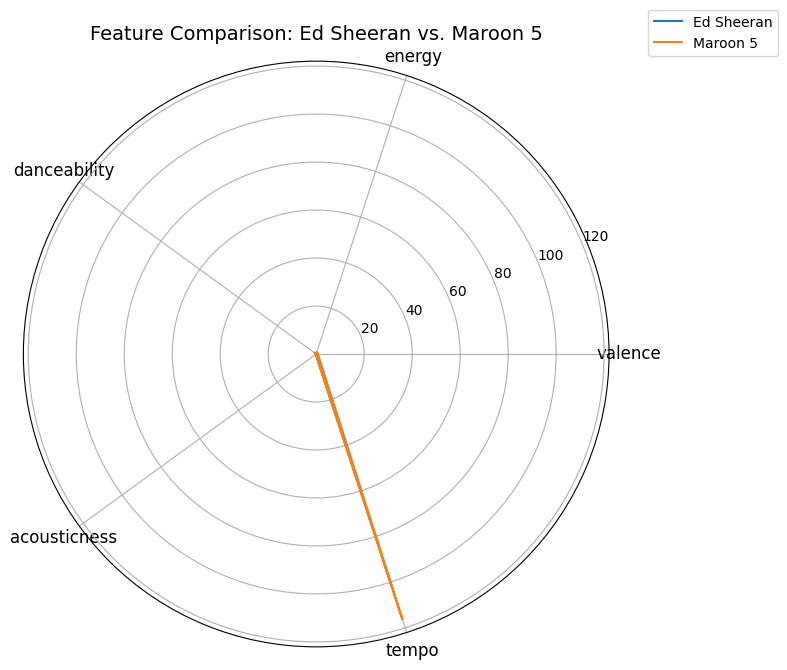

In [ ]:
# Radar chart: Feature averages for Ed Sheeran and Maroon 5
from math import pi

radar_features = ['valence', 'energy', 'danceability', 'acousticness', 'tempo']
radar_data = artists_analysis.groupby('track_artist')[radar_features].mean()

labels = radar_features
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Closing the circle

plt.figure(figsize=(8, 8))

for artist in radar_data.index:
    values = radar_data.loc[artist].values.flatten().tolist()
    values += values[:1]  # Closing the circle
    plt.polar(angles, values, label=artist)

plt.xticks(angles[:-1], labels, fontsize=12)
plt.fill(angles, values, alpha=0.3)
plt.title('Feature Comparison: Ed Sheeran vs. Maroon 5', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

**Handling Missing Values**

Missing data can disrupt the analysis, so the first step is to identify and handle missing values. Missing data in columns like 'track_name', 'track_artist', 'track_album_name' needs to be addressed.

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

df = df.dropna(subset=['track_name', 'track_artist', 'track_album_name', 'danceability', 'energy',
                           'valence', 'tempo', 'loudness', 'acousticness', 'liveness', 'speechiness',
                           'instrumentalness'])

Missing values per column:
 track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
cluster                     0
popularity_category         0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

In [ ]:
df.loc[:, 'duration'] = df['duration_ms'] / (1000 * 60)

<ipython-input-28-366ea2b010e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'duration'] = df['duration_ms'] / (1000 * 60)


In [ ]:
df = df.drop('duration_ms', axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
df.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,popularity_category,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,2,More Popular,3.2459
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,2,More Popular,2.7100


In [ ]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32828 non-null  object        
 1   track_name                32828 non-null  object        
 2   track_artist              32828 non-null  object        
 3   track_popularity          32828 non-null  int64         
 4   track_album_id            32828 non-null  object        
 5   track_album_name          32828 non-null  object        
 6   track_album_release_date  30942 non-null  datetime64[ns]
 7   playlist_name             32828 non-null  object        
 8   playlist_id               32828 non-null  object        
 9   playlist_genre            32828 non-null  object        
 10  playlist_subgenre         32828 non-null  object        
 11  danceability              32828 non-null  float64       
 12  energy                 

In [ ]:
import re

def clean_cloumns(text):
  """Removes symbols and emojis from a string."""
  pattern = re.compile(r"[^\w\s]")
  return re.sub(pattern, "", text)


columns_to_clean = ['track_name', 'track_artist', 'track_album_name', 'playlist_name','playlist_genre','playlist_subgenre']  # Replace with your desired columns
for column in columns_to_clean:
  df[column] = df[column].astype(str).apply(clean_cloumns)

In [ ]:
df = df.drop(['track_id', 'track_album_id', 'playlist_id'], axis=1)

In [ ]:
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,popularity_category,duration
0,I Dont Care with Justin Bieber Loud Luxury Remix,Ed Sheeran,66,I Dont Care with Justin Bieber Loud Luxury Remix,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,2,More Popular,3.245900
1,Memories Dillon Francis Remix,Maroon 5,67,Memories Dillon Francis Remix,2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,2,More Popular,2.710000
2,All the Time Don Diablo Remix,Zara Larsson,70,All the Time Don Diablo Remix,2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,2,More Popular,2.943600
3,Call You Mine Keanu Silva Remix,The Chainsmokers,60,Call You Mine The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,2,More Popular,2.818217
4,Someone You Loved Future Humans Remix,Lewis Capaldi,69,Someone You Loved Future Humans Remix,2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,2,More Popular,3.150867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights Official Radio Edit,Lush Simon,42,City Of Lights Vocal Mix,2014-04-28,EDM LOVE 2020,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,0,Less Popular,3.406250
32829,Closer Sultan Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,2013-03-08,EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,0,Less Popular,5.885333
32830,Sweet Surrender Radio Edit,Starkillers,14,Sweet Surrender Radio Edit,2014-04-21,EDM LOVE 2020,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,0,Less Popular,3.501867
32831,Only For You Maor Levi Remix,Mat Zo,15,Only For You Remixes,2014-01-01,EDM LOVE 2020,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,0,Less Popular,6.123867


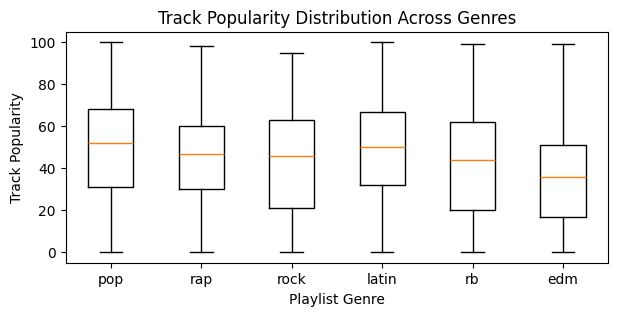

In [ ]:
plt.figure(figsize=(7, 3))


plt.boxplot([df[df['playlist_genre'] == genre]['track_popularity'] for genre in df['playlist_genre'].unique()],
            labels=df['playlist_genre'].unique(),
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})  # Customize outlier appearance


plt.xlabel('Playlist Genre')
plt.ylabel('Track Popularity')
_ = plt.title('Track Popularity Distribution Across Genres')

In [ ]:
mean_duration_by_genre = df.groupby('playlist_genre')['duration'].mean()

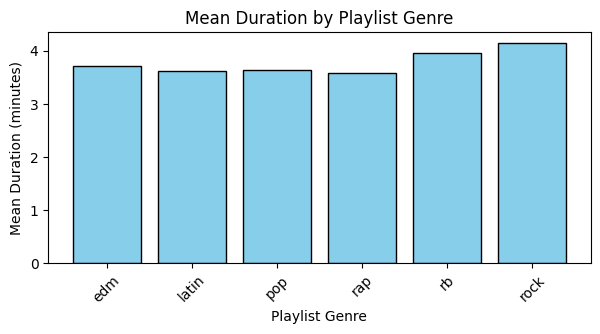

In [ ]:
plt.figure(figsize=(7, 3))
plt.bar(mean_duration_by_genre.index, mean_duration_by_genre, color='skyblue', edgecolor='black')
plt.xlabel('Playlist Genre')
plt.ylabel('Mean Duration (minutes)')
plt.title('Mean Duration by Playlist Genre')
plt.xticks(rotation=45)
plt.show()

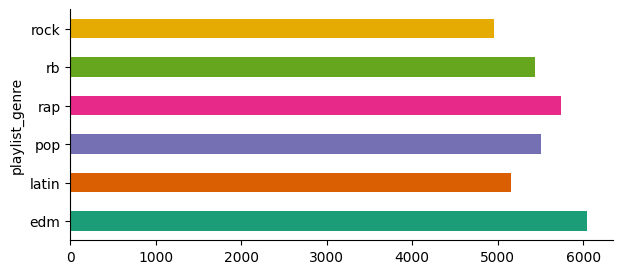

In [ ]:
import seaborn as sns
plt.figure(figsize=(7, 3))
df.groupby('playlist_genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data = df.copy()

In [ ]:
data.head(1)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,popularity_category,duration
0,I Dont Care with Justin Bieber Loud Luxury Remix,Ed Sheeran,66,I Dont Care with Justin Bieber Loud Luxury Remix,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,2,More Popular,3.2459


In [ ]:
data.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,popularity_category,duration
0,I Dont Care with Justin Bieber Loud Luxury Remix,Ed Sheeran,66,I Dont Care with Justin Bieber Loud Luxury Remix,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,2,More Popular,3.245900
1,Memories Dillon Francis Remix,Maroon 5,67,Memories Dillon Francis Remix,2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2,More Popular,2.710000
2,All the Time Don Diablo Remix,Zara Larsson,70,All the Time Don Diablo Remix,2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2,More Popular,2.943600
3,Call You Mine Keanu Silva Remix,The Chainsmokers,60,Call You Mine The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2,More Popular,2.818217
4,Someone You Loved Future Humans Remix,Lewis Capaldi,69,Someone You Loved Future Humans Remix,2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,2,More Popular,3.150867


In [ ]:
data.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'cluster', 'popularity_category', 'duration'],
      dtype='object')

In [ ]:
data.playlist_genre.unique().size

6

In [ ]:
spotify_data = data.copy()

# playlist genre	vs  track popularity

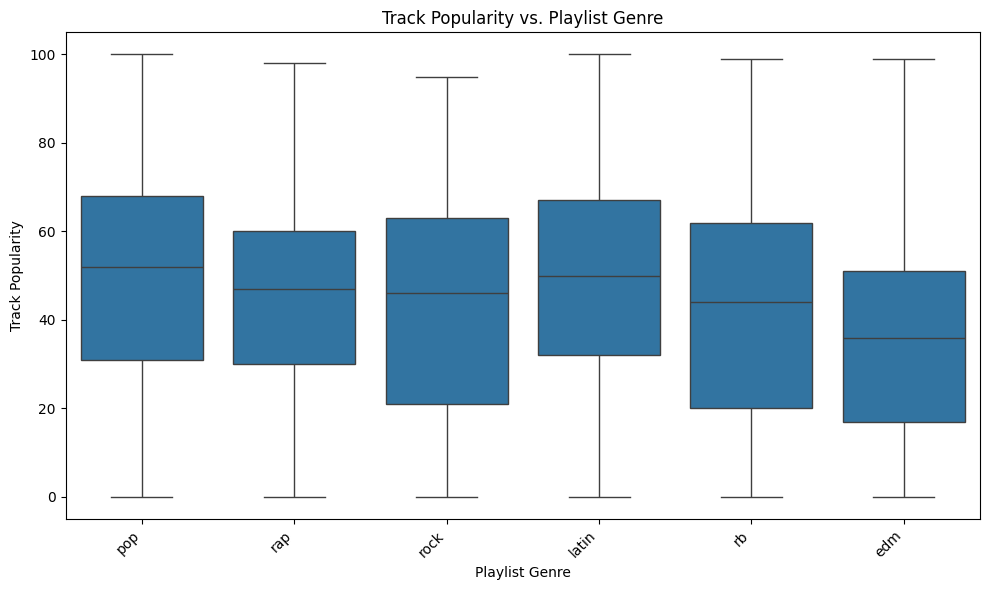

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='playlist_genre', y='track_popularity', data=spotify_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Playlist Genre')
plt.ylabel('Track Popularity')
plt.title('Track Popularity vs. Playlist Genre')
plt.tight_layout()
plt.show()

# Similarity Between Less Popular and More Popular Songs

In [ ]:
#Target-Based Encoding for 'track_artist'
artist_popularity = spotify_data.groupby('track_artist')['track_popularity'].mean()
spotify_data['artist_target_encoded'] = spotify_data['track_artist'].map(artist_popularity)


In [ ]:
#One-Hot Encode 'playlist_genre'
genre_encoded = pd.get_dummies(spotify_data['playlist_genre'], prefix='genre')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]

scaler = MinMaxScaler()
spotify_data[audio_features] = scaler.fit_transform(spotify_data[audio_features])

In [ ]:
spotify_data_encoded = pd.concat([
    spotify_data[audio_features + ['artist_target_encoded']], genre_encoded
], axis=1)

In [ ]:
spotify_data_encoded

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_target_encoded,genre_edm,genre_latin,genre_pop,genre_rap,genre_rb,genre_rock
0,0.760936,0.915985,0.918090,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,74.231884,False,False,True,False,False,False
1,0.738555,0.814968,0.869162,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,53.042254,False,False,True,False,False,False
2,0.686673,0.930988,0.901368,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,57.178571,False,False,True,False,False,False
3,0.730417,0.929988,0.894118,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,57.699187,False,False,True,False,False,False
4,0.661241,0.832971,0.875385,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,83.714286,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.435402,0.921986,0.935272,0.101961,0.077062,0.000000,0.067068,0.211907,0.535291,22.000000,True,False,False,False,False,False
32829,0.531027,0.785963,0.879785,0.045752,0.001720,0.004296,0.376506,0.403633,0.534752,20.000000,True,False,False,False,False,False
32830,0.538149,0.820969,0.870628,0.052397,0.108652,0.000001,0.150602,0.439960,0.534535,7.000000,True,False,False,False,False,False
32831,0.636826,0.887980,0.902856,0.118736,0.007968,0.127767,0.344378,0.310797,0.534614,15.000000,True,False,False,False,False,False


In [ ]:
import numpy as np

In [ ]:
spotify_data['popularity_category'] = np.where(spotify_data['track_popularity'] >= 50, 'more_popular', 'less_popular')

In [ ]:
less_popular_encoded = spotify_data[spotify_data['popularity_category'] == 'less_popular']
more_popular_encoded = spotify_data[spotify_data['popularity_category'] == 'more_popular']

In [ ]:
print("Prepared Dataset Shape:", spotify_data_encoded.shape)
print("Less Popular Songs Shape:", less_popular_encoded.shape)
print("More Popular Songs Shape:", more_popular_encoded.shape)

Prepared Dataset Shape: (32828, 16)
Less Popular Songs Shape: (18368, 23)
More Popular Songs Shape: (14460, 23)


In [ ]:
print("Columns in less_popular_encoded but not in spotify_data_encoded:")
print(set(less_popular_encoded.columns) - set(spotify_data_encoded.columns))

print("Columns in more_popular_encoded but not in spotify_data_encoded:")
print(set(more_popular_encoded.columns) - set(spotify_data_encoded.columns))

print("Columns in spotify_data_encoded but not in less_popular_encoded:")
print(set(spotify_data_encoded.columns) - set(less_popular_encoded.columns))

print("Columns in spotify_data_encoded but not in more_popular_encoded:")
print(set(spotify_data_encoded.columns) - set(more_popular_encoded.columns))


Columns in less_popular_encoded but not in spotify_data_encoded:
{'track_popularity', 'track_album_release_date', 'key', 'playlist_genre', 'cluster', 'track_artist', 'mode', 'playlist_name', 'track_name', 'duration', 'popularity_category', 'track_album_name', 'playlist_subgenre'}
Columns in more_popular_encoded but not in spotify_data_encoded:
{'track_popularity', 'track_album_release_date', 'key', 'playlist_genre', 'cluster', 'track_artist', 'mode', 'playlist_name', 'track_name', 'duration', 'popularity_category', 'track_album_name', 'playlist_subgenre'}
Columns in spotify_data_encoded but not in less_popular_encoded:
{'genre_pop', 'genre_edm', 'genre_rb', 'genre_rock', 'genre_rap', 'genre_latin'}
Columns in spotify_data_encoded but not in more_popular_encoded:
{'genre_pop', 'genre_edm', 'genre_rb', 'genre_rock', 'genre_rap', 'genre_latin'}


In [ ]:
# Reapply one-hot encoding for playlist genres
less_popular_encoded = pd.get_dummies(
    less_popular_encoded,
    columns=['playlist_genre'],
    prefix='genre',
    drop_first=True
)
more_popular_encoded = pd.get_dummies(
    more_popular_encoded,
    columns=['playlist_genre'],
    prefix='genre',
    drop_first=True
)


In [ ]:
common_columns = set(spotify_data_encoded.columns).intersection(
    less_popular_encoded.columns, more_popular_encoded.columns
)
spotify_data_encoded = spotify_data_encoded[list(common_columns)]
less_popular_encoded = less_popular_encoded[list(common_columns)]
more_popular_encoded = more_popular_encoded[list(common_columns)]


In [ ]:
from scipy.stats import ttest_ind
features_to_test = spotify_data_encoded.columns.tolist()

results = {'Feature': [], 'T-Statistic': [], 'P-Value': []}

for feature in features_to_test:
    less_popular_values = less_popular_encoded[feature].dropna()
    more_popular_values = more_popular_encoded[feature].dropna()

    t_stat, p_value = ttest_ind(less_popular_values, more_popular_values, equal_var=False)

    results['Feature'].append(feature)
    results['T-Statistic'].append(t_stat)
    results['P-Value'].append(p_value)

test_results = pd.DataFrame(results)
test_results['Adjusted P-Value'] = test_results['P-Value'] * len(features_to_test)
test_results['Significant'] = test_results['Adjusted P-Value'] < 0.05

print(test_results)


                  Feature  T-Statistic        P-Value  Adjusted P-Value  \
0             speechiness    -0.618961   5.359464e-01      8.039196e+00   
1               genre_pop   -15.233587   3.395252e-52      5.092878e-51   
2                liveness     7.210069   5.715182e-13      8.572774e-12   
3   artist_target_encoded  -149.377789   0.000000e+00      0.000000e+00   
4                  energy    15.664797   4.256760e-55      6.385140e-54   
5                genre_rb     2.347447   1.890874e-02      2.836310e-01   
6                   tempo     0.630856   5.281396e-01      7.922094e+00   
7              genre_rock    -3.316355   9.130628e-04      1.369594e-02   
8                 valence    -7.230129   4.934825e-13      7.402237e-12   
9            acousticness   -11.672841   2.045461e-31      3.068191e-30   
10               loudness   -10.268392   1.069503e-24      1.604254e-23   
11              genre_rap    -3.188410   1.432015e-03      2.148022e-02   
12       instrumentalness

In [ ]:
features_to_test = spotify_data_encoded.columns.tolist()

#results dictionary
results = {'Feature': [], 'T-Statistic': [], 'P-Value': []}

# Performing t-tests for each feature to test their significance
for feature in features_to_test:
    less_popular_values = less_popular_encoded[feature].dropna()
    more_popular_values = more_popular_encoded[feature].dropna()

    t_stat, p_value = ttest_ind(less_popular_values, more_popular_values, equal_var=False)

    # adding to results
    results['Feature'].append(feature)
    results['T-Statistic'].append(t_stat)
    results['P-Value'].append(p_value)

test_results = pd.DataFrame(results)

# Adjust p-values for multiple comparisons (Bonferroni correction)
test_results['Adjusted P-Value'] = test_results['P-Value'] * len(features_to_test)
test_results['Significant'] = test_results['Adjusted P-Value'] < 0.05

test_results


,Feature,T-Statistic,P-Value,Adjusted P-Value,Significant
0,speechiness,-0.618961,5.359464e-01,8.039196e+00,False
1,genre_pop,-15.233587,3.395252e-52,5.092878e-51,True
2,liveness,7.210069,5.715182e-13,8.572774e-12,True
3,artist_target_encoded,-149.377789,0.000000e+00,0.000000e+00,True
4,energy,15.664797,4.256760e-55,6.385140e-54,True
5,genre_rb,2.347447,1.890874e-02,2.836310e-01,False
6,tempo,0.630856,5.281396e-01,7.922094e+00,False
7,genre_rock,-3.316355,9.130628e-04,1.369594e-02,True
8,valence,-7.230129,4.934825e-13,7.402237e-12,True
9,acousticness,-11.672841,2.045461e-31,3.068191e-30,True


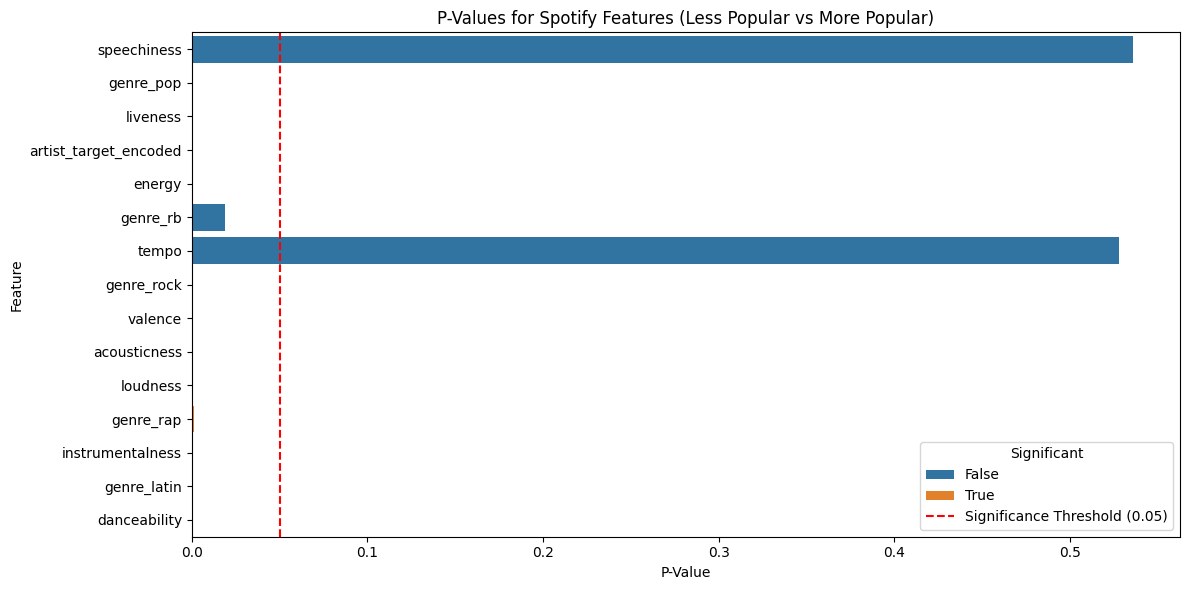

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=test_results, x='P-Value', y='Feature', hue='Significant', dodge=False)
plt.axvline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title("P-Values for Spotify Features (Less Popular vs More Popular)")
plt.xlabel("P-Value")
plt.ylabel("Feature")
plt.legend(title="Significant")
plt.tight_layout()
plt.show()

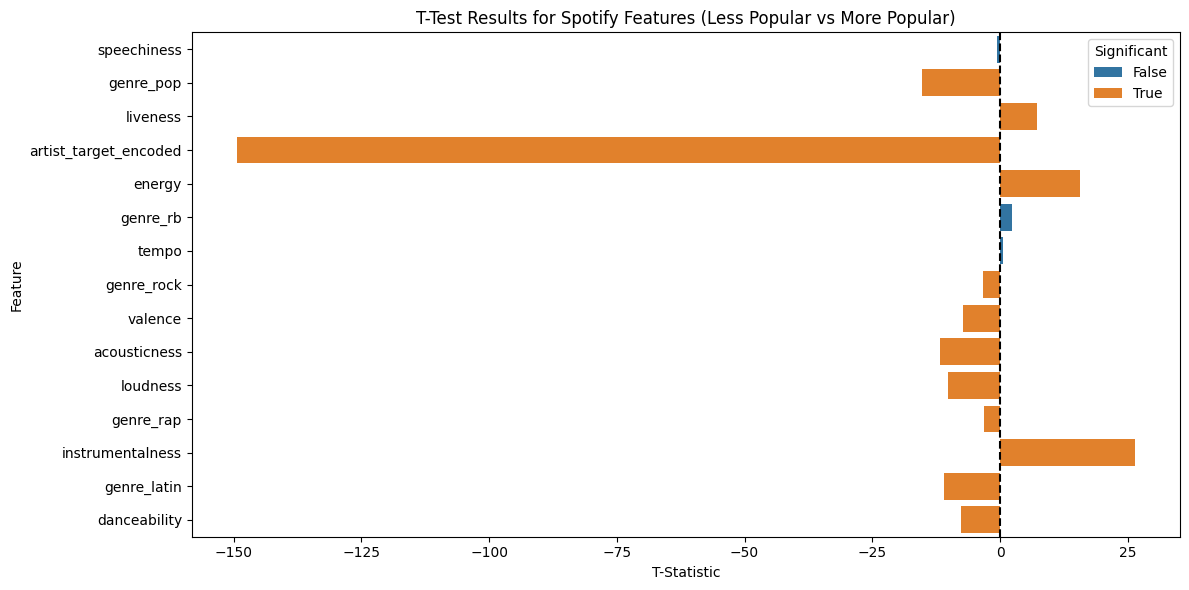

In [ ]:
# Plot T-Statistics
plt.figure(figsize=(12, 6))
sns.barplot(data=test_results, x='T-Statistic', y='Feature', hue='Significant', dodge=False)
plt.axvline(0, color='black', linestyle='--')
plt.title("T-Test Results for Spotify Features (Less Popular vs More Popular)")
plt.xlabel("T-Statistic")
plt.ylabel("Feature")
plt.legend(title="Significant")
plt.tight_layout()
plt.show()

# what's make a song more popular or less popular?

### Cluster Analysis

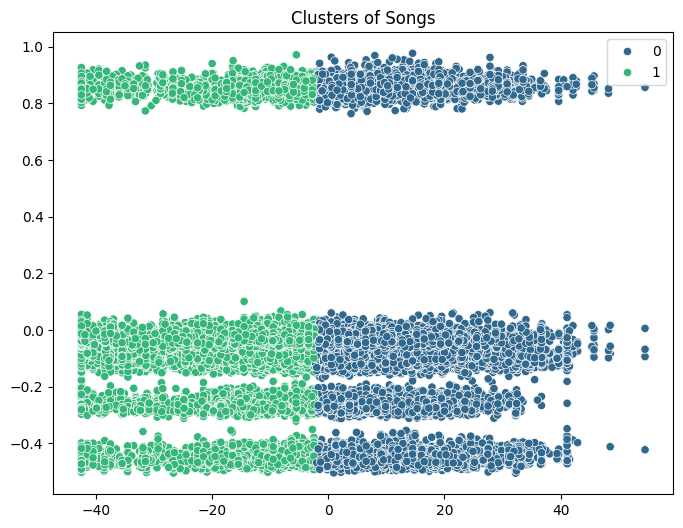

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(spotify_data_encoded)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of Songs')
plt.show()


In [ ]:
spotify_data['Cluster'] = clusters
cluster_popularity = spotify_data.groupby(['Cluster', 'popularity_category']).size()
print(cluster_popularity)


Cluster  popularity_category
0        less_popular            6108
         more_popular           12776
1        less_popular           12260
         more_popular            1684
dtype: int64


In [ ]:
cluster_features = spotify_data_encoded.copy()
cluster_features['Cluster'] = clusters
cluster_means = cluster_features.groupby('Cluster').mean()
cluster_means


,speechiness,genre_pop,liveness,artist_target_encoded,energy,genre_rb,tempo,genre_rock,valence,acousticness,loudness,genre_rap,instrumentalness,genre_latin,danceability
Cluster,,,,,,,,,,,,,,,
0,0.117726,0.193762,0.184342,55.337005,0.684619,0.147479,0.504672,0.149492,0.520493,0.192326,0.835656,0.187778,0.058942,0.186825,0.670606
1,0.115112,0.132530,0.199873,25.076449,0.717416,0.189759,0.505114,0.152610,0.508014,0.154855,0.828181,0.157559,0.120928,0.116538,0.660175


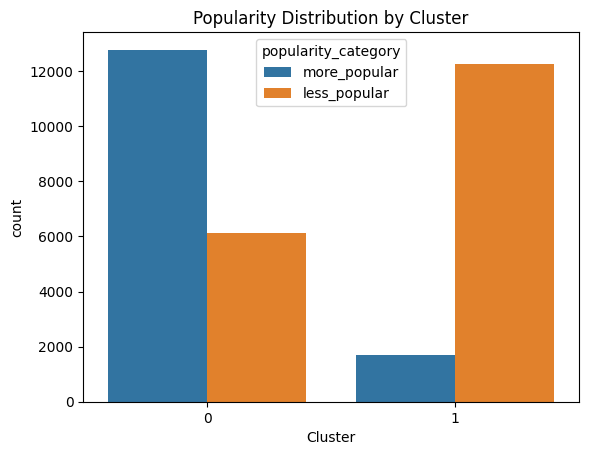

In [ ]:
sns.countplot(data=spotify_data, x='Cluster', hue='popularity_category')
plt.title("Popularity Distribution by Cluster")
plt.show()


### Identifying Key Features Using Feature Importance

<ipython-input-67-d11d3f2ca01b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_sorted, x='Importance', y='Feature', palette="viridis")


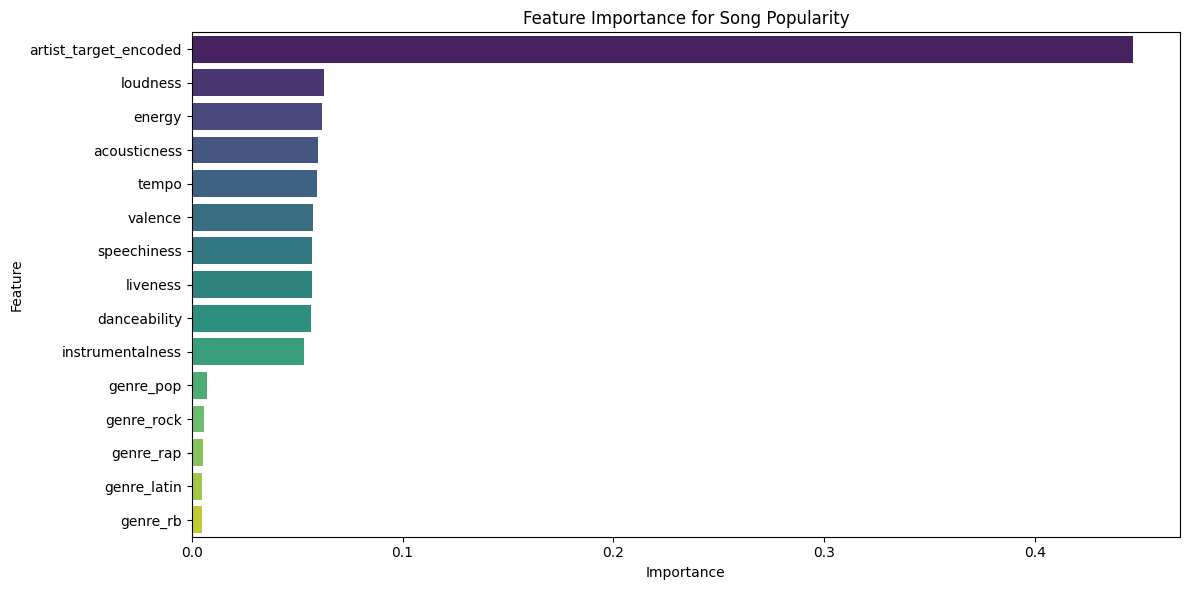

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = spotify_data_encoded
y = (spotify_data['popularity_category'] == 'more_popular').astype(int)  # Binary target: 1 for more popular, 0 for less popular

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_sorted, x='Importance', y='Feature', palette="viridis")
plt.title("Feature Importance for Song Popularity")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Comparing Feature Distributions for more popular and less popular songs

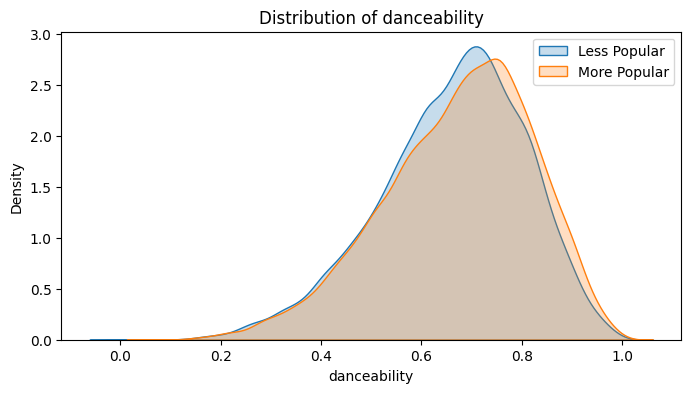

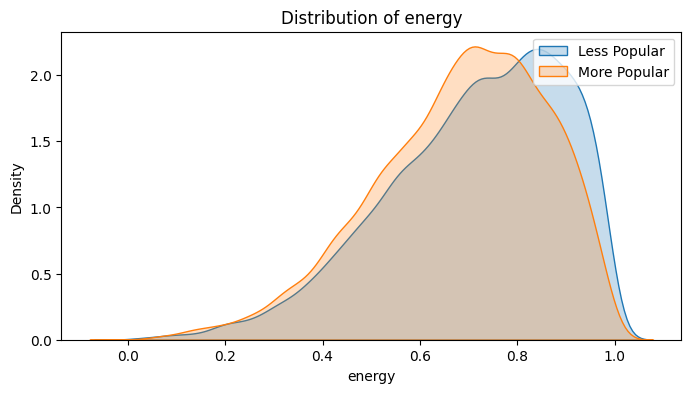

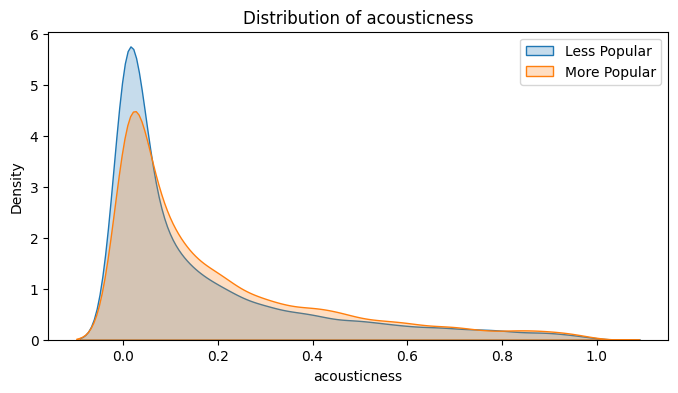

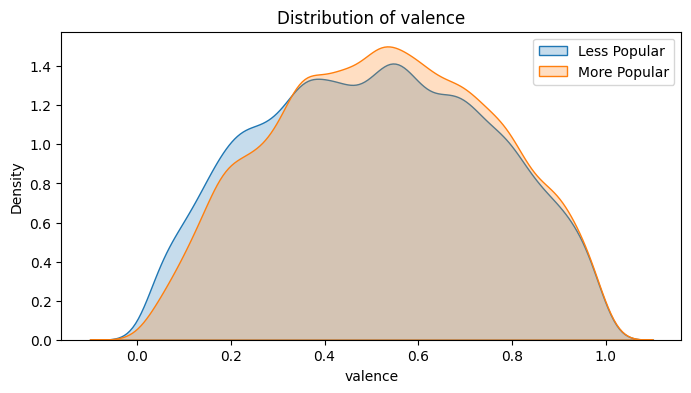

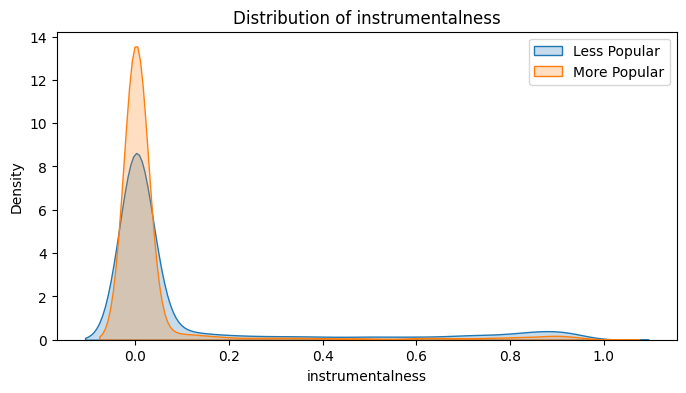

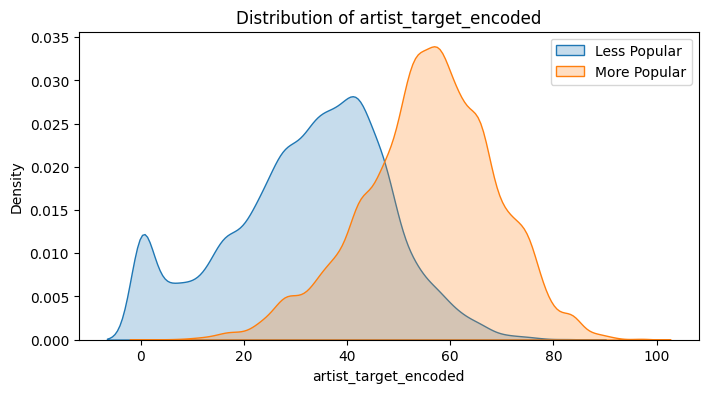

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

key_features = ['danceability', 'energy', 'acousticness', 'valence', 'instrumentalness','artist_target_encoded']
for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=less_popular_encoded, x=feature, label='Less Popular', fill=True)
    sns.kdeplot(data=more_popular_encoded, x=feature, label='More Popular', fill=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

# More Popular vs Less Popular Songs by Genre

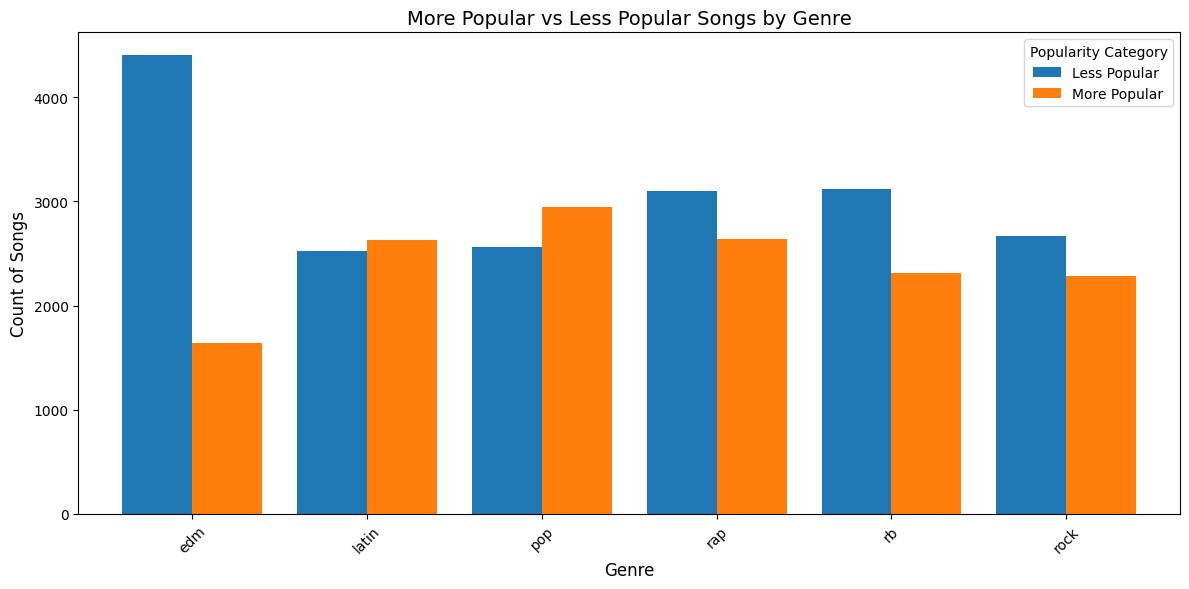

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by playlist_genre and popularity_category
genre_popularity = spotify_data.groupby(['playlist_genre', 'popularity_category']).size().unstack(fill_value=0)

# Plot the double bar graph
genre_popularity.plot(kind='bar', figsize=(12, 6), width=0.8)

# Customize the plot
plt.title('More Popular vs Less Popular Songs by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count of Songs', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Popularity Category', labels=['Less Popular', 'More Popular'])
plt.tight_layout()
plt.show()


# Top Artists and the Genres They Produce

<Figure size 1400x800 with 0 Axes>

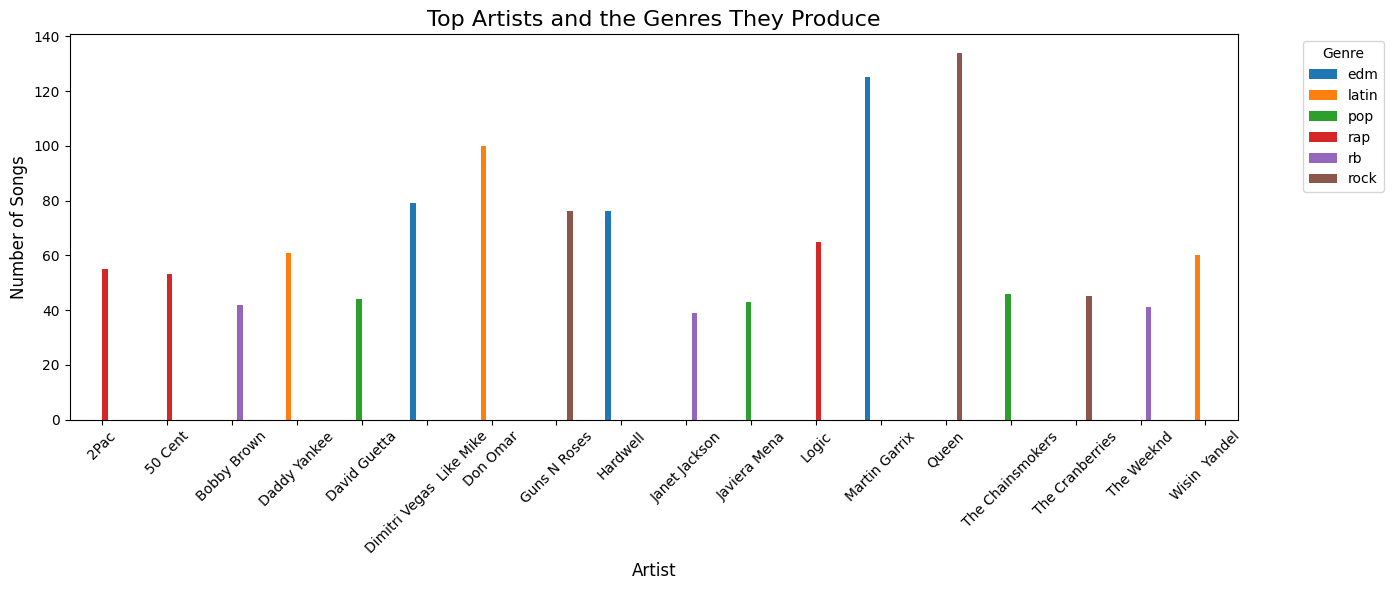

In [ ]:
# Group data by artist and genre, and count the number of songs
artist_genre_count = spotify_data.groupby(['track_artist', 'playlist_genre']).size().reset_index(name='song_count')

# Finding the top artists for each genre
top_artists_per_genre = artist_genre_count.sort_values(by=['playlist_genre', 'song_count'], ascending=[True, False])
top_artists_per_genre = top_artists_per_genre.groupby('playlist_genre').head(3)

pivot_data = top_artists_per_genre.pivot(index='track_artist', columns='playlist_genre', values='song_count').fillna(0)
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=False, figsize=(14, 6))

plt.title('Top Artists and the Genres They Produce', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Top Artists by Average Popularity Score

<ipython-input-71-fea01159e67b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='track_popularity', y='track_artist', palette='viridis')


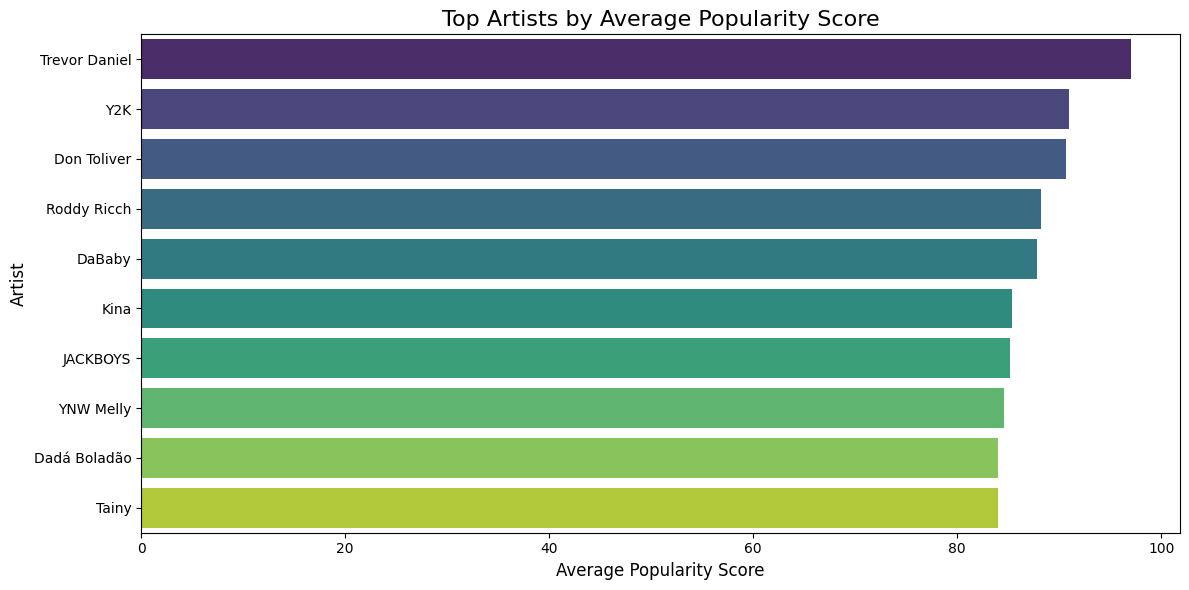

In [ ]:
artist_popularity = spotify_data.groupby('track_artist')['track_popularity'].mean().reset_index()
top_artists = artist_popularity.sort_values(by='track_popularity', ascending=False).head(10)  # Top 10 artists
plt.figure(figsize=(12, 6))
sns.barplot(data=top_artists, x='track_popularity', y='track_artist', palette='viridis')

plt.title('Top Artists by Average Popularity Score', fontsize=16)
plt.xlabel('Average Popularity Score', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.tight_layout()
plt.show()


# Song Popularity Analysis: Ed Sheeran and Maroon 5

In [ ]:
artist_1_name = "Ed Sheeran"
artist_2_name = "Maroon 5"

artist_1_popularity = spotify_data[spotify_data['track_artist'] == artist_1_name]['track_popularity']
artist_2_popularity = spotify_data[spotify_data['track_artist'] == artist_2_name]['track_popularity']

# Performing a t-test to compare the average popularity of the two artists
t_stat, p_value = ttest_ind(artist_1_popularity, artist_2_popularity, equal_var=False)

result = {
    "Artist 1": artist_1_name,
    "Artist 2": artist_2_name,
    "Artist 1 Mean Popularity": artist_1_popularity.mean(),
    "Artist 2 Mean Popularity": artist_2_popularity.mean(),
    "T-Statistic": t_stat,
    "P-Value": p_value
}

print("Comparison Results:")
for key, value in result.items():
    print(f"{key}: {value}")

Comparison Results:
Artist 1: Ed Sheeran
Artist 2: Maroon 5
Artist 1 Mean Popularity: 74.23188405797102
Artist 2 Mean Popularity: 53.04225352112676
T-Statistic: 4.724843441532335
P-Value: 7.020356105390916e-06


In [ ]:
print(df.columns)


Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'cluster', 'popularity_category', 'duration'],
      dtype='object')


In [ ]:
# Derive mood from valence
df['mood'] = df['valence'].apply(lambda x: 'happy' if x > 0.5 else 'sad')

# Verify the new column
print(df[['valence', 'mood']].head())


   valence   mood
0    0.518  happy
1    0.693  happy
2    0.613  happy
3    0.277    sad
4    0.725  happy


In [ ]:
from scipy.stats import ttest_ind

# Split data into happy and sad songs based on mood
happy_songs = df[df['mood'] == 'happy']['valence']
sad_songs = df[df['mood'] == 'sad']['valence']

# Perform the t-test
t_stat, p_value = ttest_ind(happy_songs, sad_songs)
print(f"T-test: t_stat = {t_stat}, p-value = {p_value}")

T-test: t_stat = 280.94332550583346, p-value = 0.0


# T-test for valence (happy vs sad songs)

In [ ]:
# T-test for valence (happy vs sad songs)
from scipy.stats import ttest_ind

happy_songs = df[df['mood'] == 'happy']['valence']
sad_songs = df[df['mood'] == 'sad']['valence']
t_stat, p_value = ttest_ind(happy_songs, sad_songs)
print(f"T-test: t_stat = {t_stat}, p-value = {p_value}")

T-test: t_stat = 280.94332550583346, p-value = 0.0


# Chi-square test for mode and mood association

In [ ]:
# Chi-square test for mode and mood association
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['mode'], df['mood'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square: chi2 = {chi2}, p-value = {p}")


Chi-square: chi2 = 0.005930894660304233, p-value = 0.9386137584480716


# Identifying Emerging Artists

<ipython-input-78-7bd2a456aa6d>:23: UserWarning: Glyph 12458 (\N{KATAKANA LETTER O}) missing from current font.
  plt.tight_layout()
<ipython-input-78-7bd2a456aa6d>:23: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  plt.tight_layout()
<ipython-input-78-7bd2a456aa6d>:23: UserWarning: Glyph 12460 (\N{KATAKANA LETTER GA}) missing from current font.
  plt.tight_layout()
<ipython-input-78-7bd2a456aa6d>:23: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.tight_layout()
<ipython-input-78-7bd2a456aa6d>:23: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  plt.tight_layout()
<ipython-input-78-7bd2a456aa6d>:23: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  plt.tight_layout()
<ipython-input-78-7bd2a456aa6d>:23: UserWarning: Glyph 12502 (\N{KATAKANA LETTER BU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.

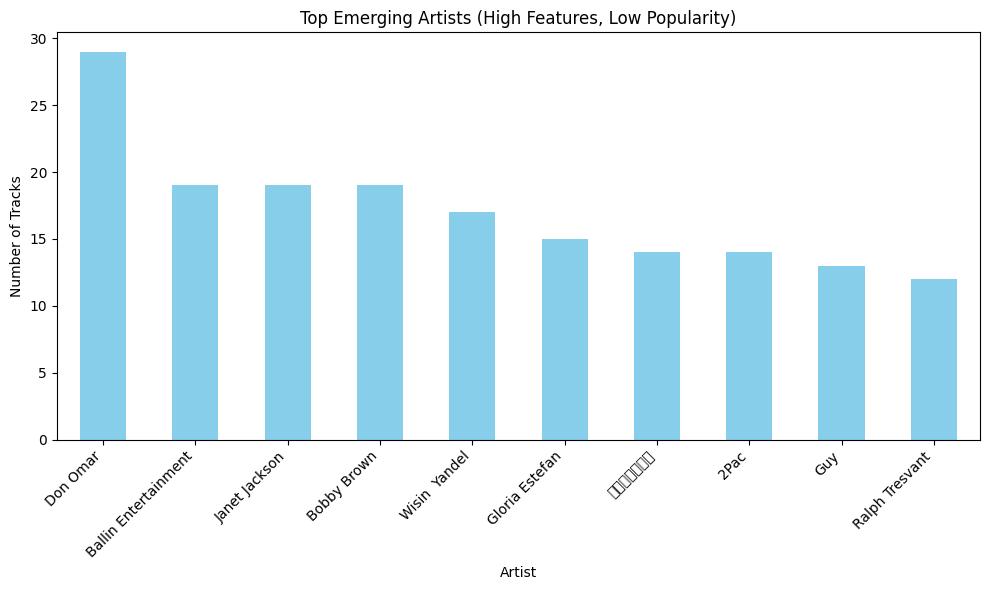

In [ ]:
# Emerging Artists Analysis
# Define quality threshold: More Popular Features
popular_features = ['danceability', 'energy', 'valence']
feature_means = df[df['track_popularity'] >= 50][popular_features].mean()

# Filter for emerging artists: Low popularity but matching features
emerging_artists = df[
    (df['track_popularity'] < 50) &
    (df['danceability'] > feature_means['danceability']) &
    (df['energy'] > feature_means['energy']) &
    (df['valence'] > feature_means['valence'])
]

top_emerging_artists = emerging_artists.groupby('track_artist').size().sort_values(ascending=False).head(10)

# Visualization: Emerging artists
plt.figure(figsize=(10, 6))
top_emerging_artists.plot(kind='bar', color='skyblue')
plt.title('Top Emerging Artists (High Features, Low Popularity)')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#  Key Genre Trends Over Time

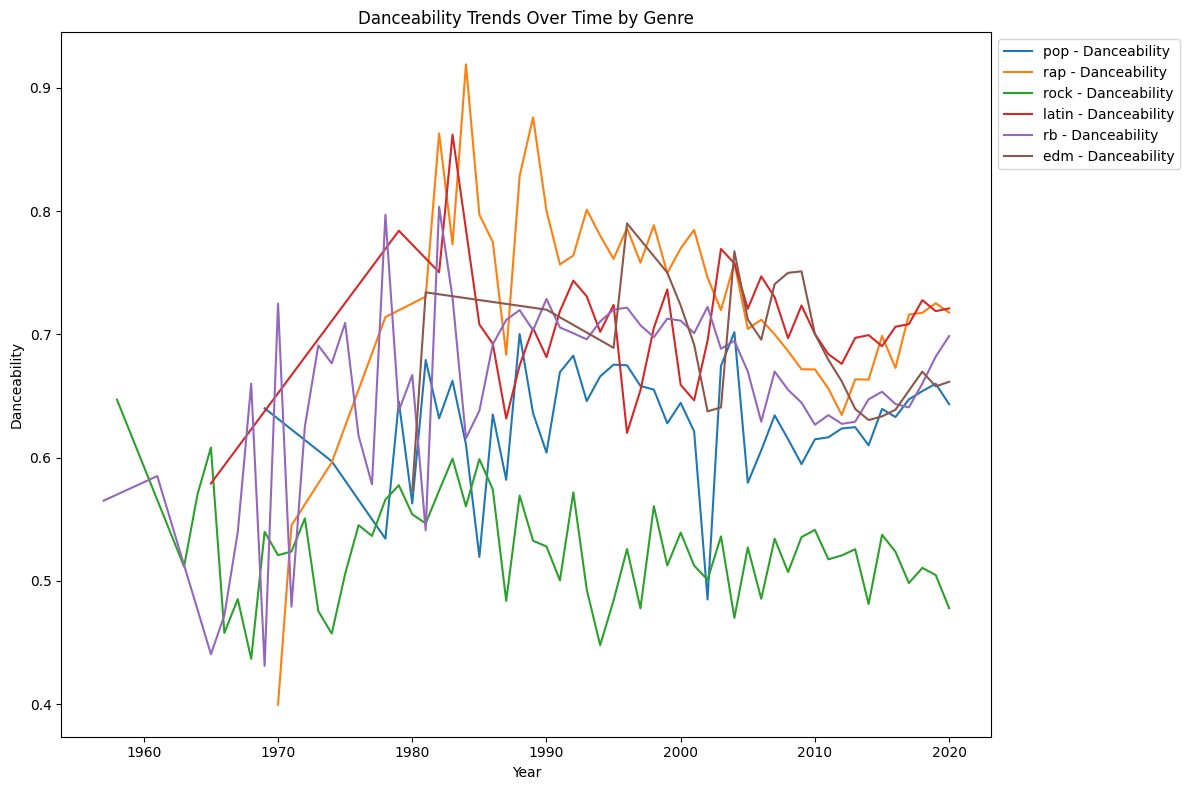

In [ ]:
# Key Genre Trends Over Time
df['release_year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

genre_trend = df.groupby(['release_year', 'playlist_genre'])[['danceability', 'energy', 'valence']].mean().reset_index()

plt.figure(figsize=(12, 8))
for genre in df['playlist_genre'].unique():
    subset = genre_trend[genre_trend['playlist_genre'] == genre]
    plt.plot(subset['release_year'], subset['danceability'], label=f'{genre} - Danceability')

plt.title('Danceability Trends Over Time by Genre')
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Predicting Future Hit Songs

Accuracy: 0.6816935729515687
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.74      3695
           1       0.67      0.54      0.60      2871

    accuracy                           0.68      6566
   macro avg       0.68      0.67      0.67      6566
weighted avg       0.68      0.68      0.68      6566



<ipython-input-80-8a85774b48b2>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


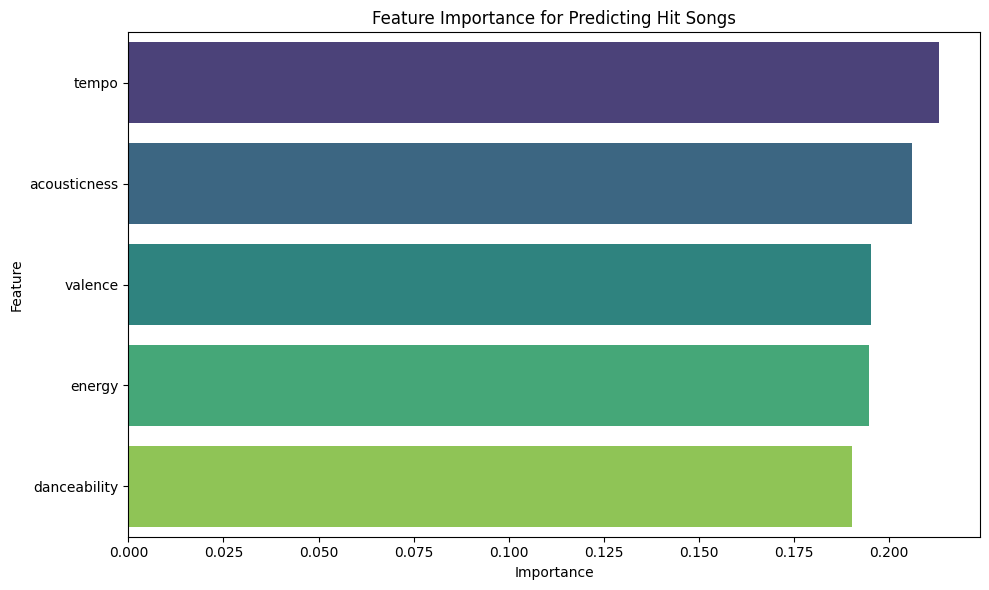

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df[['danceability', 'energy', 'tempo', 'valence', 'acousticness']]
y = (df['track_popularity'] >= 50).astype(int)  # Binary: 1 = More Popular, 0 = Less Popular


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Predicting Hit Songs')
plt.tight_layout()
plt.show()

Cross-Validation Scores: [0.83407155 0.84324416 0.83591753 0.84324416 0.84614074]
Mean CV Accuracy: 0.8405236302078631

Test Set Performance:
Accuracy: 0.8429789826378312
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      3695
           1       0.83      0.80      0.82      2871

    accuracy                           0.84      6566
   macro avg       0.84      0.84      0.84      6566
weighted avg       0.84      0.84      0.84      6566



<ipython-input-94-76d6eaf015e9>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


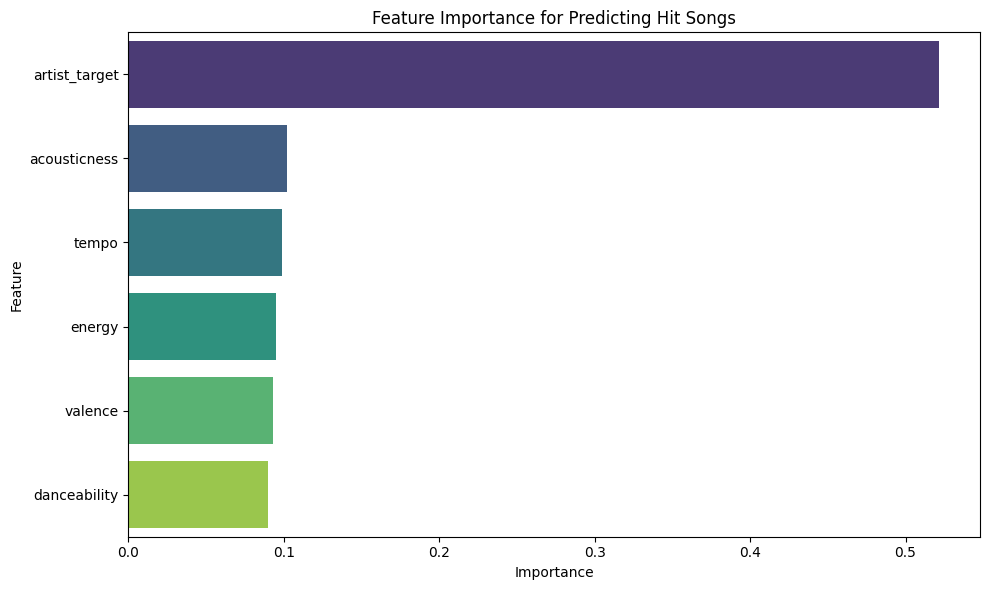

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Target Encoding for Artists
artist_target_encoding = df.groupby('track_artist')['track_popularity'].mean()
df['artist_target'] = df['track_artist'].map(artist_target_encoding)

X = df[['danceability', 'energy', 'tempo', 'valence', 'acousticness', 'artist_target']]
y = (df['track_popularity'] >= 50).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resampling the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=skf, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Training
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluation
y_pred = rf_model.predict(X_test)
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Predicting Hit Songs')
plt.tight_layout()
plt.show()

# Market Analysis for Genres

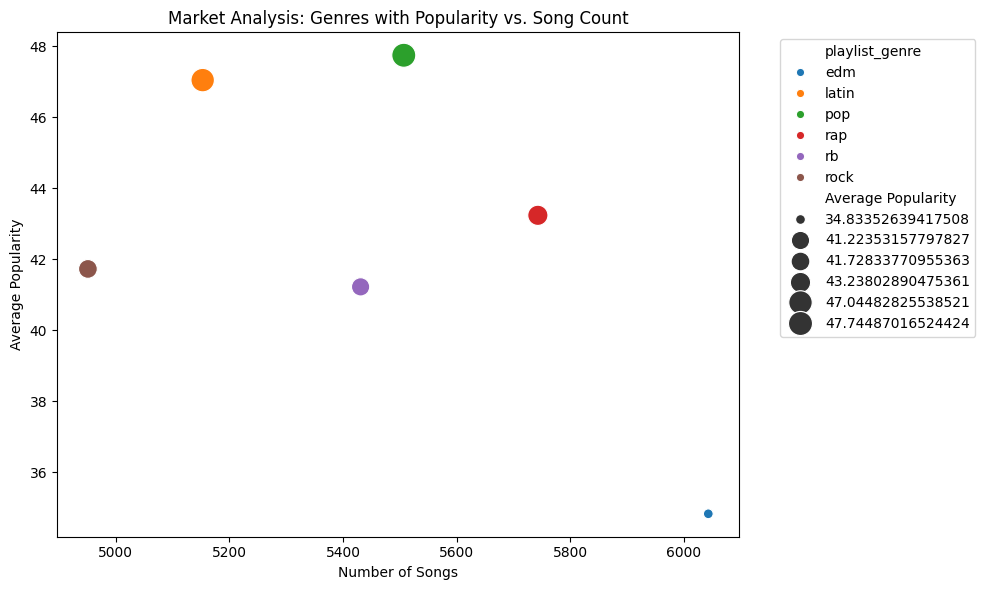

In [ ]:
# Average Popularity by Genre
genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
genre_song_count = df['playlist_genre'].value_counts()# Number of Songs per Genre

genre_analysis = pd.DataFrame({
    'Average Popularity': genre_popularity,
    'Number of Songs': genre_song_count
}).reset_index().rename(columns={'index': 'playlist_genre'})

#  Popularity vs. Song Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genre_analysis, x='Number of Songs', y='Average Popularity', hue='playlist_genre', size='Average Popularity', sizes=(50, 300))
plt.title('Market Analysis: Genres with Popularity vs. Song Count')
plt.xlabel('Number of Songs')
plt.ylabel('Average Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,popularity_category,duration,mood,release_year
0,I Dont Care with Justin Bieber Loud Luxury Remix,Ed Sheeran,66,I Dont Care with Justin Bieber Loud Luxury Remix,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,2,More Popular,3.245900,happy,2019.0
1,Memories Dillon Francis Remix,Maroon 5,67,Memories Dillon Francis Remix,2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,2,More Popular,2.710000,happy,2019.0
2,All the Time Don Diablo Remix,Zara Larsson,70,All the Time Don Diablo Remix,2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,2,More Popular,2.943600,happy,2019.0
3,Call You Mine Keanu Silva Remix,The Chainsmokers,60,Call You Mine The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,2,More Popular,2.818217,sad,2019.0
4,Someone You Loved Future Humans Remix,Lewis Capaldi,69,Someone You Loved Future Humans Remix,2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,2,More Popular,3.150867,happy,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights Official Radio Edit,Lush Simon,42,City Of Lights Vocal Mix,2014-04-28,EDM LOVE 2020,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,0,Less Popular,3.406250,sad,2014.0
32829,Closer Sultan Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,2013-03-08,EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,0,Less Popular,5.885333,sad,2013.0
32830,Sweet Surrender Radio Edit,Starkillers,14,Sweet Surrender Radio Edit,2014-04-21,EDM LOVE 2020,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,0,Less Popular,3.501867,sad,2014.0
32831,Only For You Maor Levi Remix,Mat Zo,15,Only For You Remixes,2014-01-01,EDM LOVE 2020,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,0,Less Popular,6.123867,sad,2014.0
